In [516]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objs as go

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [517]:
customer = pd.read_csv('customers.csv')
properties = pd.read_csv('properties.csv')

In [518]:
customer.head(5)

,Unnamed: 0,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [519]:
properties.head(5)

,Unnamed: 0,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


## Droping the Unnamed index column 

In [521]:
customer = customer.loc[:, ~customer.columns.str.contains('^Unnamed')]
properties = properties.loc[:, ~properties.columns.str.contains('^Unnamed')]

In [522]:
customer.head(5)

,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [523]:
properties.head()

,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


In [524]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ﻿customerid        162 non-null    object
 1   entity             162 non-null    object
 2   name               162 non-null    object
 3   surname            162 non-null    object
 4   birth_date         155 non-null    object
 5   sex                155 non-null    object
 6   country            162 non-null    object
 7   state              154 non-null    object
 8   purpose            162 non-null    object
 9   deal_satisfaction  162 non-null    int64 
 10  mortgage           162 non-null    object
 11  source             162 non-null    object
dtypes: int64(1), object(11)
memory usage: 15.3+ KB


In [525]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ﻿id         267 non-null    int64  
 1   building    267 non-null    int64  
 2   date_sale   267 non-null    object 
 3   type        267 non-null    object 
 4   property#   267 non-null    int64  
 5   area        267 non-null    float64
 6   price       267 non-null    object 
 7   status      267 non-null    object 
 8   customerid  195 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 18.9+ KB


## Rename the customerid colum in customer data

In [527]:
customer = customer.rename(columns={'﻿customerid': 'customerid'})

print("\nDataFrame after renaming columns:")
print(customer)



DataFrame after renaming columns:
    customerid      entity     name     surname  birth_date  sex country  \
0        C0110  Individual   Kareem         Liu   5/11/1968    F     USA   
1        C0010  Individual  Trystan     Oconnor  11/26/1962    M     USA   
2        C0132  Individual     Kale         Gay    4/7/1959    M     USA   
3        C0137  Individual  Russell       Gross  11/25/1959    M     USA   
4        C0174     Company  Marleez          Co         NaN  NaN    USA    
..         ...         ...      ...         ...         ...  ...     ...   
157      C0170  Individual     Emmy       Singh   12/3/1979    F     USA   
158      C0138  Individual    Colin      Campos   4/14/1942    M     USA   
159      C0113  Individual     Anya  Stephenson   6/11/1959    F     USA   
160      C0147  Individual   Parker       Poole  11/10/1951    M     USA   
161      C0133  Individual     Ivan      Bright   9/15/1953    M     USA   

          state     purpose  deal_satisfaction mortg

In [528]:
properties = properties.rename(columns={'﻿id': 'id'})

In [529]:
properties = properties.rename(columns={'property#': 'property'})

## Replace '#NUM!' with a specific date indicating 'Ongoing'

In [531]:
 properties['date_sale'] = properties['date_sale'].replace('#NUM!', '01/01/2100')

## Replace "-" as "Unsold" in status column

In [533]:
properties ['status'] = properties['status'].replace('-','Unsold')

## Replace missing values for companies with 'N/A'and 'NaT'
NaT will still recognize as a missing value

In [535]:
customer.loc[customer['entity'] == 'Company', 'birth_date'] = pd.NaT 
customer.loc[customer['entity'] == 'Company', 'sex'] = 'N/A'

## droping the raws that country not equal to 'USA'

In [537]:
#customer = customer[customer['country'] == 'USA']

## Trim white space in country column

In [539]:
customer['country'] = customer['country'].str.strip().str.upper() 

## changing the price to correct data type

In [541]:
properties['price'] = properties['price'].replace(r'[\$,]', '', regex=True)

properties['price'] = properties['price'].str.strip()

properties['price'] = properties['price'].astype(float)



## Changing dates to date data types

In [543]:
customer['birth_date'] = pd.to_datetime(customer['birth_date'])

In [544]:
properties['date_sale'] = pd.to_datetime(properties['date_sale'])

In [545]:
customer.info()
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customerid         162 non-null    object        
 1   entity             162 non-null    object        
 2   name               162 non-null    object        
 3   surname            162 non-null    object        
 4   birth_date         155 non-null    datetime64[ns]
 5   sex                162 non-null    object        
 6   country            162 non-null    object        
 7   state              154 non-null    object        
 8   purpose            162 non-null    object        
 9   deal_satisfaction  162 non-null    int64         
 10  mortgage           162 non-null    object        
 11  source             162 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 15.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 

## combining name and surname in to one full name 

In [547]:
customer['full_name'] = customer['name']+' '+customer['surname']

In [548]:
customer.head()

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,Individual,Kareem,Liu,1968-05-11,F,USA,California,Home,4,Yes,Website,Kareem Liu
1,C0010,Individual,Trystan,Oconnor,1962-11-26,M,USA,California,Home,1,No,Website,Trystan Oconnor
2,C0132,Individual,Kale,Gay,1959-04-07,M,USA,California,Home,4,Yes,Agency,Kale Gay
3,C0137,Individual,Russell,Gross,1959-11-25,M,USA,California,Home,5,No,Website,Russell Gross
4,C0174,Company,Marleez,Co,NaT,N/A,USA,California,Investment,5,No,Website,Marleez Co


## Drop the name and surname column that no longer need

In [550]:
customer=customer.drop(['name','surname'], axis=1)

In [551]:
properties.head()

,id,building,date_sale,type,property,area,price,status,customerid
0,1030,1,2005-11-01,Apartment,30,743.09,246172.68,Sold,C0028
1,1029,1,2005-10-01,Apartment,29,756.21,246331.90,Sold,C0027
2,2002,2,2007-07-01,Apartment,2,587.28,209280.91,Sold,C0112
3,2031,2,2007-12-01,Apartment,31,1604.75,452667.01,Sold,C0160
4,1049,1,2004-11-01,Apartment,49,1375.45,467083.31,Sold,C0014


## Trim whitespace and ensure consistent casing to combine data set

In [553]:
 
customer['customerid'] = customer['customerid'].str.strip().str.upper() 
properties['customerid'] = properties['customerid'].str.strip().str.upper()

## Merge DataFrames using left join

In [555]:

customer = pd.DataFrame(customer)
properties = pd.DataFrame(properties)

# Merge the DataFrames using an inner join
Realstate = pd.merge(customer, properties, on='customerid', how='right')

print(Realstate)



    customerid      entity birth_date  sex country       state     purpose  \
0        C0028  Individual 1986-06-21    F     USA  California        Home   
1        C0027  Individual 1983-02-24    F     USA  California        Home   
2        C0112  Individual 1985-12-27    M     USA  California        Home   
3        C0160  Individual 1985-12-27    M     USA  California  Investment   
4        C0014  Individual 1979-05-15    F     USA  California        Home   
..         ...         ...        ...  ...     ...         ...         ...   
262        NaN         NaN        NaT  NaN     NaN         NaN         NaN   
263        NaN         NaN        NaT  NaN     NaN         NaN         NaN   
264        NaN         NaN        NaT  NaN     NaN         NaN         NaN   
265        NaN         NaN        NaT  NaN     NaN         NaN         NaN   
266        NaN         NaN        NaT  NaN     NaN         NaN         NaN   

     deal_satisfaction mortgage   source         full_name    i

In [556]:
Realstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customerid         195 non-null    object        
 1   entity             195 non-null    object        
 2   birth_date         178 non-null    datetime64[ns]
 3   sex                195 non-null    object        
 4   country            195 non-null    object        
 5   state              181 non-null    object        
 6   purpose            195 non-null    object        
 7   deal_satisfaction  195 non-null    float64       
 8   mortgage           195 non-null    object        
 9   source             195 non-null    object        
 10  full_name          195 non-null    object        
 11  id                 267 non-null    int64         
 12  building           267 non-null    int64         
 13  date_sale          267 non-null    datetime64[ns]
 14  type      

In [557]:
Realstate

,customerid,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name,id,building,date_sale,type,property,area,price,status
0,C0028,Individual,1986-06-21,F,USA,California,Home,5.0,No,Website,Madalyn Mercer,1030,1,2005-11-01,Apartment,30,743.09,246172.68,Sold
1,C0027,Individual,1983-02-24,F,USA,California,Home,5.0,No,Website,Lara Carrillo,1029,1,2005-10-01,Apartment,29,756.21,246331.90,Sold
2,C0112,Individual,1985-12-27,M,USA,California,Home,1.0,Yes,Client,Donavan Flowers,2002,2,2007-07-01,Apartment,2,587.28,209280.91,Sold
3,C0160,Individual,1985-12-27,M,USA,California,Investment,3.0,Yes,Website,Darien Dorsey,2031,2,2007-12-01,Apartment,31,1604.75,452667.01,Sold
4,C0014,Individual,1979-05-15,F,USA,California,Home,4.0,No,Agency,Alessandra Perry,1049,1,2004-11-01,Apartment,49,1375.45,467083.31,Sold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5044,5,2100-01-01,Apartment,44,1238.58,322610.74,Unsold
263,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5047,5,2100-01-01,Apartment,47,794.52,279191.26,Unsold
264,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5048,5,2100-01-01,Apartment,48,1013.27,287996.53,Unsold
265,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5050,5,2100-01-01,Apartment,50,1074.71,365868.78,Unsold


In [558]:
Realstate['state'] = Realstate['state'].fillna('Unknown')


In [559]:
# Remove duplicate rows
Realstate_no_duplicates = Realstate.drop_duplicates()


Realstate_no_duplicates.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customerid         195 non-null    object        
 1   entity             195 non-null    object        
 2   birth_date         178 non-null    datetime64[ns]
 3   sex                195 non-null    object        
 4   country            195 non-null    object        
 5   state              267 non-null    object        
 6   purpose            195 non-null    object        
 7   deal_satisfaction  195 non-null    float64       
 8   mortgage           195 non-null    object        
 9   source             195 non-null    object        
 10  full_name          195 non-null    object        
 11  id                 267 non-null    int64         
 12  building           267 non-null    int64         
 13  date_sale          267 non-null    datetime64[ns]
 14  type      

In [560]:
# Export DataFrame to CSV
Realstate.to_csv('realstate_data.csv', index=False)


## Descriptive statistics 

In [562]:
Realstate.describe()

,birth_date,deal_satisfaction,id,building,date_sale,property,area,price
count,178,195.000000,267.000000,267.000000,267,267.000000,267.000000,267.000000
mean,1961-01-08 11:35:43.820224704,3.600000,2975.142322,2.947566,2031-12-21 22:01:20.898876416,27.580524,936.221311,281171.901386
min,1931-02-13 00:00:00,1.000000,1002.000000,1.000000,2004-03-01 00:00:00,1.000000,410.710000,117564.070000
25%,1951-05-04 06:00:00,3.000000,2015.500000,2.000000,2006-09-01 00:00:00,14.500000,756.210000,217553.055000
50%,1962-09-23 00:00:00,4.000000,3024.000000,3.000000,2007-07-01 00:00:00,28.000000,798.280000,249075.660000
75%,1970-07-09 06:00:00,5.000000,4031.500000,4.000000,2100-01-01 00:00:00,40.000000,1121.950000,326964.855000
max,1986-06-21 00:00:00,5.000000,5052.000000,5.000000,2100-01-01 00:00:00,59.000000,1942.500000,538271.740000
std,NaN,1.340872,1392.197474,1.391794,NaN,15.361437,284.894858,89119.121005


## Listed property by the type 

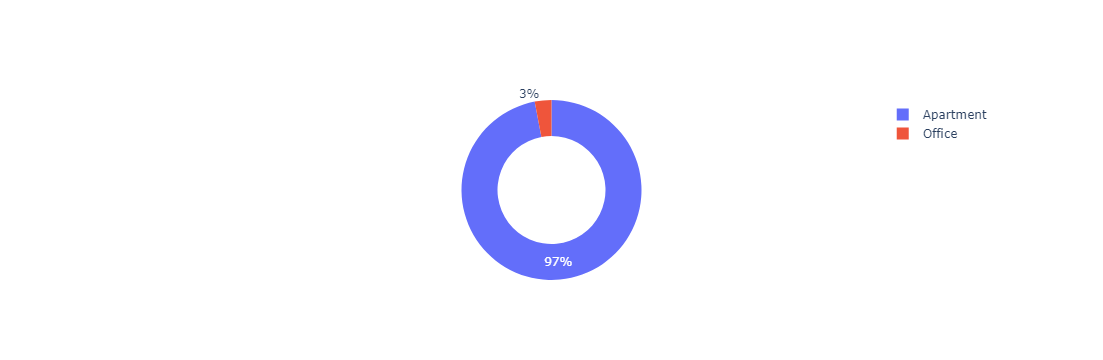

In [564]:
lowerRealstate = Realstate.groupby('type').size()
labels = lowerRealstate.index
values = lowerRealstate.values

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])
fig.show()

## Total revenue of the sold properties by the property type

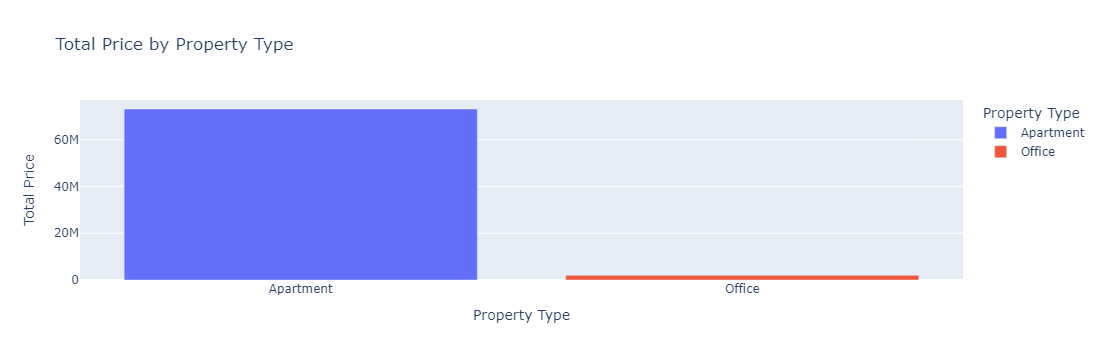

In [565]:
# Group by 'type' and sum the prices
total_price_by_type = Realstate.groupby('type')['price'].sum().reset_index()

fig = px.bar(total_price_by_type, x='type', y='price', 
             title='Total Price by Property Type', 
             labels={'price': 'Total Price', 'type': 'Property Type'},
             color='type', 
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.show()


## Average property Price by the type

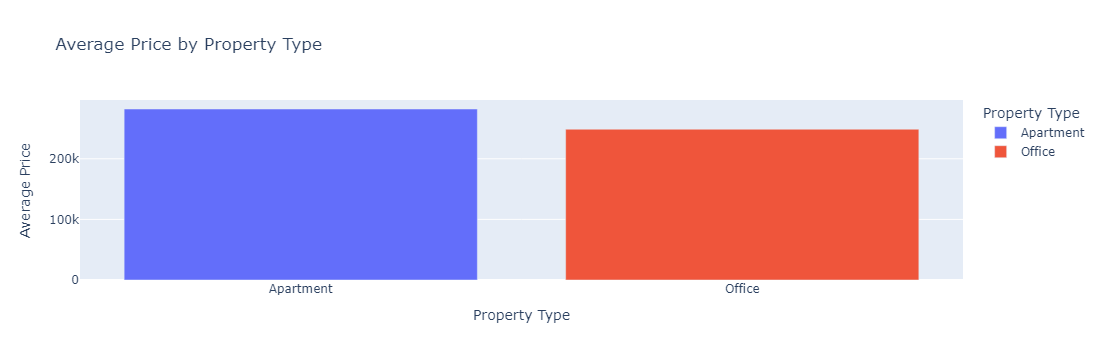

In [566]:
total_price_by_type = Realstate.groupby('type')['price'].mean().reset_index()

fig = px.bar(total_price_by_type, x='type', y='price',
             title='Average Price by Property Type', 
             labels={'price': 'Average Price', 'type': 'Property Type'},
             color='type', 
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.show()

## Number of properties by Mortgage status according to the type of the property 

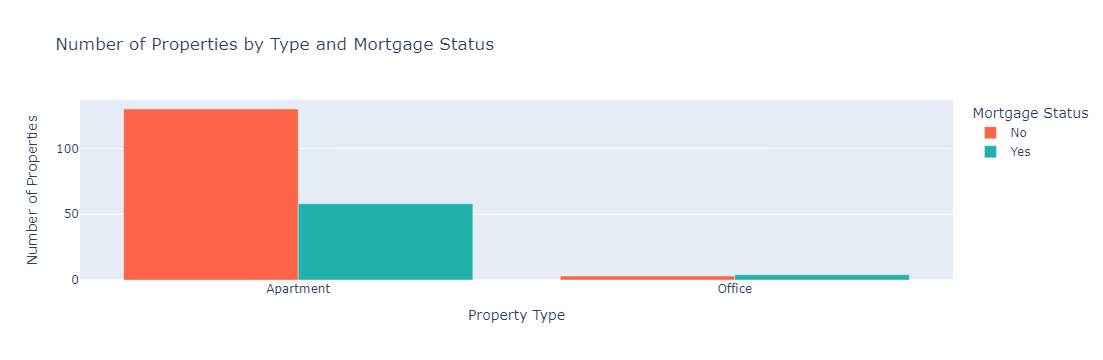

In [567]:
# Group by 'type' and 'mortgage', then count the number of properties
count_by_type_and_mortgage = Realstate.groupby(['type', 'mortgage']).size().reset_index(name='count')

# Create a grouped bar chart
fig = px.bar(count_by_type_and_mortgage, x='type', y='count', color='mortgage', 
             title='Number of Properties by Type and Mortgage Status',
             labels={'count': 'Number of Properties', 'type': 'Property Type', 'mortgage': 'Mortgage Status'},
             barmode='group', color_discrete_sequence=['#FF6347', '#20B2AA'])

fig.show()


## Average price of properties by Mortgage status according to the type of the property 

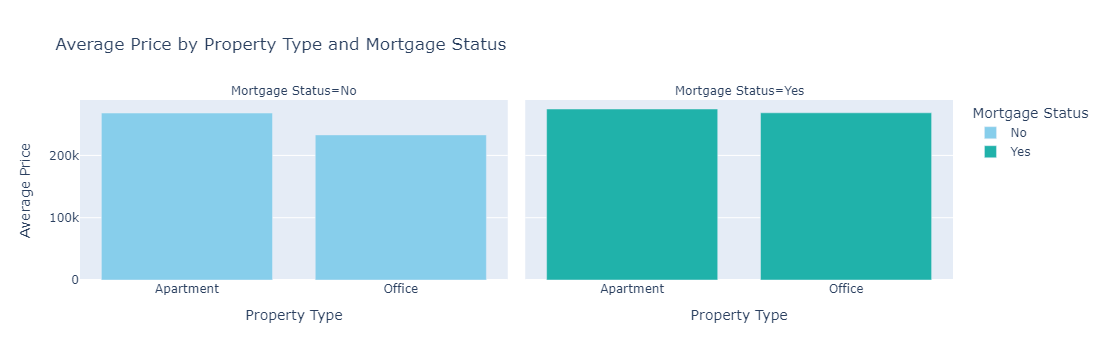

In [568]:
total_price_by_type_and_mortgage = Realstate.groupby(['type', 'mortgage'])['price'].mean().reset_index()

# Create a side-by-side bar chart with separate subplots for mortgaged and non-mortgaged properties
fig = px.bar(total_price_by_type_and_mortgage, x='type', y='price', color='mortgage',
             facet_col='mortgage',
             title='Average Price by Property Type and Mortgage Status',
             labels={'price': 'Average Price', 'type': 'Property Type', 'mortgage': 'Mortgage Status'},
             color_discrete_sequence=['skyblue', 'lightseagreen'])

fig.show()


### Number of properties by the status according to the type

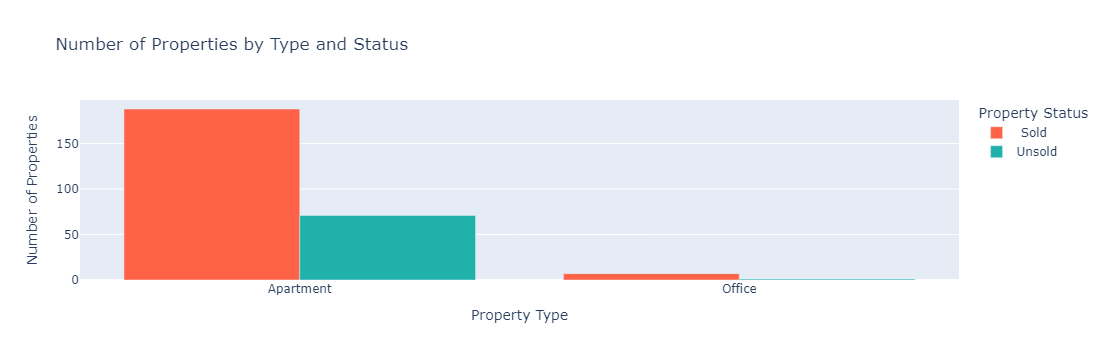

In [569]:
count_by_type_and_mortgage = Realstate.groupby(['type', 'status']).size().reset_index(name='count')

# Create a grouped bar chart
fig = px.bar(count_by_type_and_mortgage, x='type', y='count', color='status', 
             title='Number of Properties by Type and Status',
             labels={'count': 'Number of Properties', 'type': 'Property Type', 'status': 'Property Status'},
             barmode='group', color_discrete_sequence=['#FF6347', '#20B2AA'])

fig.show()

### Average price by the property property status according to the property type 

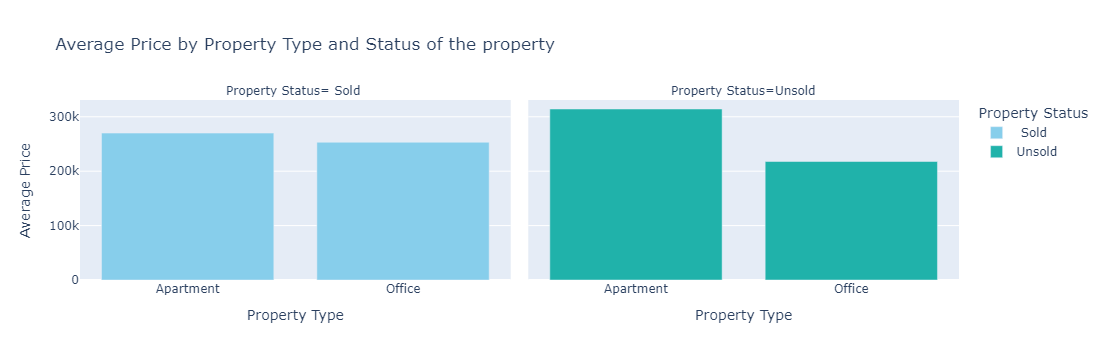

In [570]:
total_price_by_type_and_mortgage = Realstate.groupby(['type', 'status'])['price'].mean().reset_index()

# Create a side-by-side bar chart with separate subplots for mortgaged and non-mortgaged properties
fig = px.bar(total_price_by_type_and_mortgage, x='type', y='price', color='status',
             facet_col='status',
             title='Average Price by Property Type and Status of the property',
             labels={'price': 'Average Price', 'type': 'Property Type', 'status': 'Property Status'},
             color_discrete_sequence=['skyblue', 'lightseagreen'])

fig.show()

### Total number of sold properties

In [571]:
# Ensure there are no leading/trailing spaces in the 'status' column
Realstate['status'] = Realstate['status'].str.strip()

# Count the number of occurrences of each status
status_counts = Realstate['status'].value_counts()

# Get the number of sold properties
sold_properties_count = status_counts.get('Sold', 0)
print(f'Number of Sold properties: {sold_properties_count}')


Number of Sold properties: 195


### Total Number of Sold Properties with Mortgage Status by Property Type

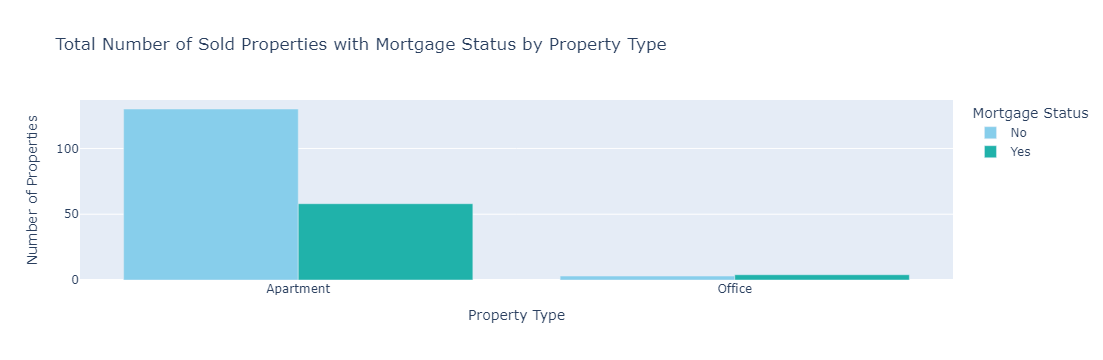

In [572]:
# Filter only sold properties
sold_properties = Realstate[Realstate['status'] == 'Sold'].copy()

# Handle missing mortgage information by filling with 'Unknown'
sold_properties.loc[:, 'mortgage'] = sold_properties['mortgage'].fillna('Unknown')

# Group by 'type' and 'mortgage', then count the number of properties
total_sold_properties = sold_properties.groupby(['type', 'mortgage']).size().reset_index(name='count')

# Create a bar chart with separate subplots for mortgaged and non-mortgaged properties
fig = px.bar(total_sold_properties, x='type', y='count', color='mortgage',
             barmode='group',
             title='Total Number of Sold Properties with Mortgage Status by Property Type',
             labels={'count': 'Number of Properties', 'type': 'Property Type', 'mortgage': 'Mortgage Status'},
             color_discrete_sequence=['skyblue', 'lightseagreen', 'lightcoral'])  # Custom colors including 'Unknown'

fig.show()


### Overall average satiscation for sold properties 

In [573]:
AVG_satisfaction = round(Realstate['deal_satisfaction'].mean(),2)
print(f'The average overall satisfaction is:{ AVG_satisfaction}')

The average overall satisfaction is:3.6


### Average satisfaction by the property type

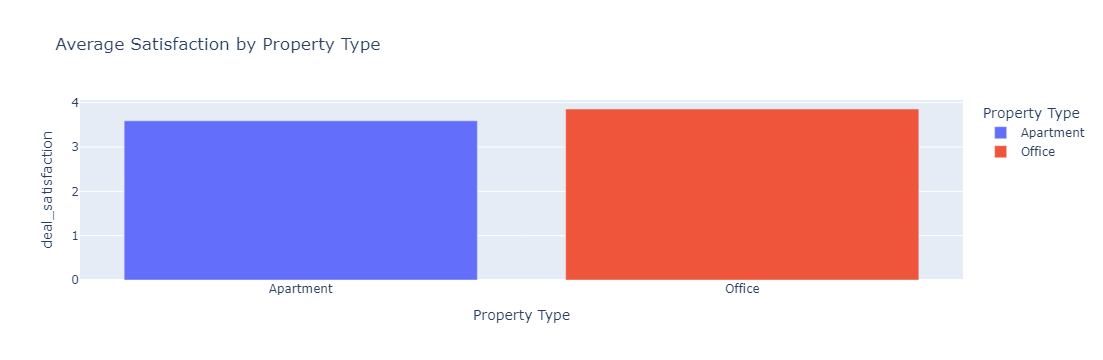

In [574]:
total_price_by_type = Realstate.groupby('type')['deal_satisfaction'].mean().reset_index()

fig = px.bar(total_price_by_type, x='type', y='deal_satisfaction',
             title='Average Satisfaction by Property Type', 
             labels={'price': 'Average Satisfaction', 'type': 'Property Type'},
             color='type', 
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.show()

### Average area by the property type 

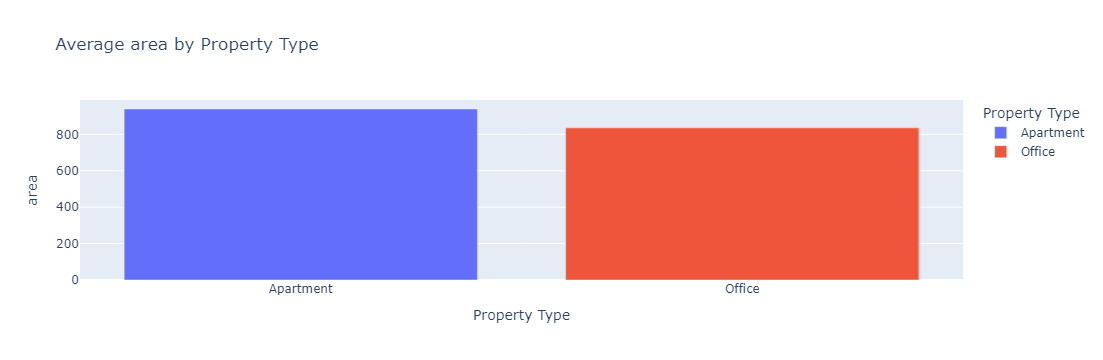

In [575]:
total_price_by_type = Realstate.groupby('type')['area'].mean().reset_index()

fig = px.bar(total_price_by_type, x='type', y='area',
             title='Average area by Property Type', 
             labels={'price': 'Average area', 'type': 'Property Type'},
             color='type', 
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.show()

### Relationship between area and the price 

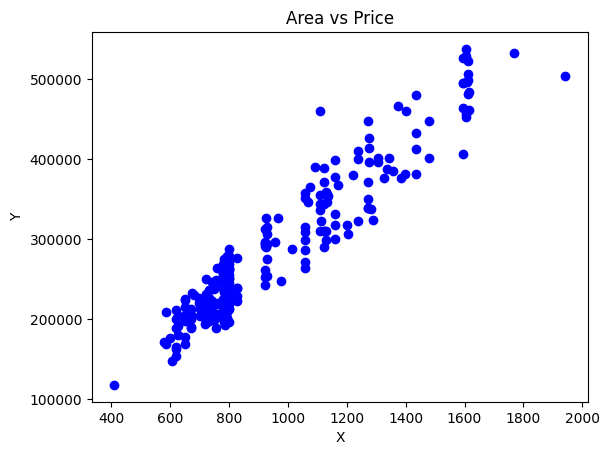

R^2: 0.9045671162846964
R: 0.9510873336790352


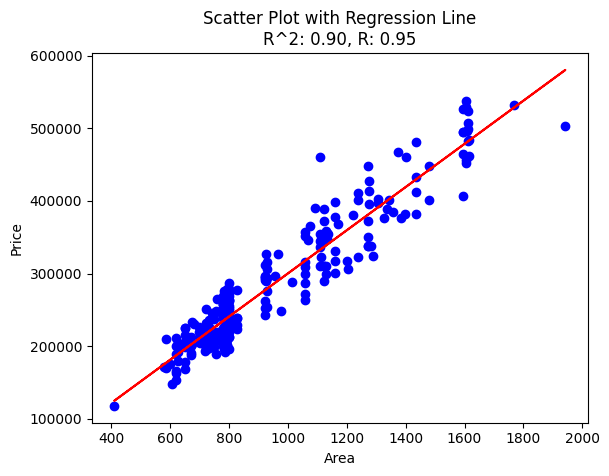

In [576]:
plt.scatter(Realstate['area'], Realstate['price'], color='blue')
plt.title('Area vs Price')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Fit a linear regression model
X = Realstate['area'].values.reshape(-1, 1)
Y =  Realstate['price'].values
model = LinearRegression()
model.fit(X, Y)

# Calculate R^2 and R values
Y_pred = model.predict(X)
r2 = r2_score(Y, Y_pred)
r = np.sqrt(r2)
print(f'R^2: {r2}')
print(f'R: {r}')

# Plot the regression line
plt.scatter(Realstate['area'], Realstate['price'], color='blue')
plt.plot(Realstate['area'], Y_pred, color='red')
plt.title(f'Scatter Plot with Regression Line\nR^2: {r2:.2f}, R: {r:.2f}')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()


### Country distribution

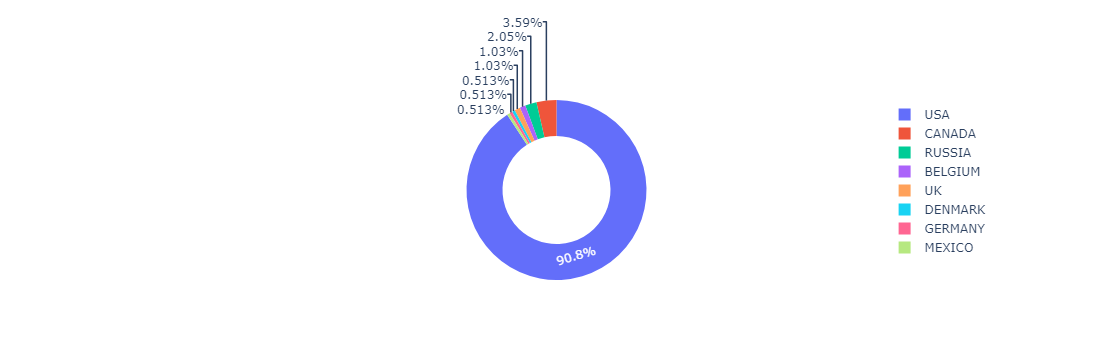

In [577]:
lowerRealstate = Realstate.groupby('country').size()
labels = lowerRealstate.index
values = lowerRealstate.values

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])
fig.show()

### Number of properties by the country 

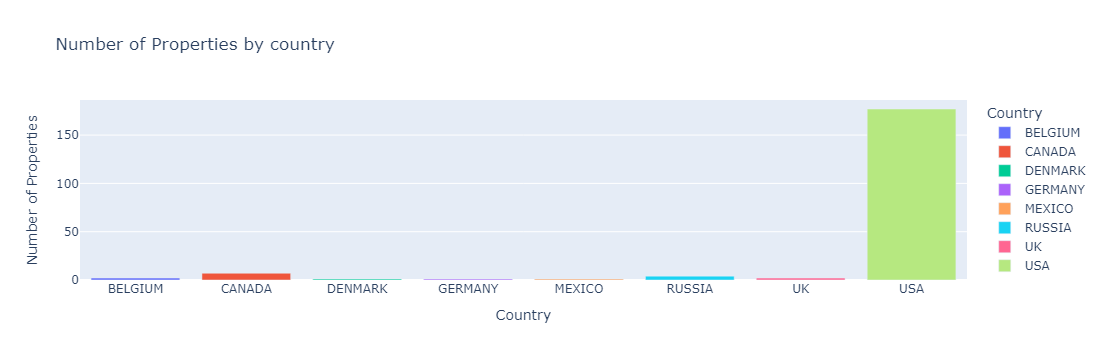

In [578]:
total_price_by_type = Realstate.groupby('country')['id'].size().reset_index()

fig = px.bar(total_price_by_type, x='country', y='id',
             title='Number of Properties by country', 
             labels={'id': 'Number of Properties', 'country': 'Country'},
             color='country', 
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.show()

### Average Property Price by Country 

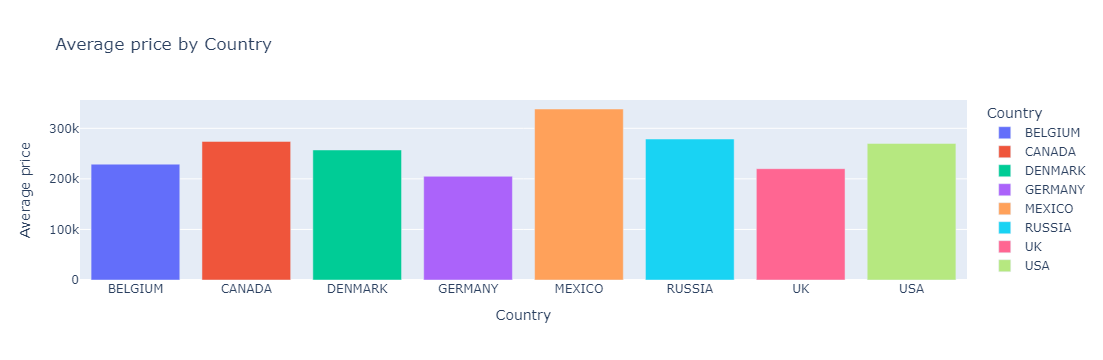

In [579]:
total_price_by_type = Realstate.groupby('country')['price'].mean().reset_index()

fig = px.bar(total_price_by_type, x='country', y='price',
             title='Average price by Country', 
             labels={'price': 'Average price', 'country': 'Country'},
             color='country', 
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.show()

### Average price by Property type and Country

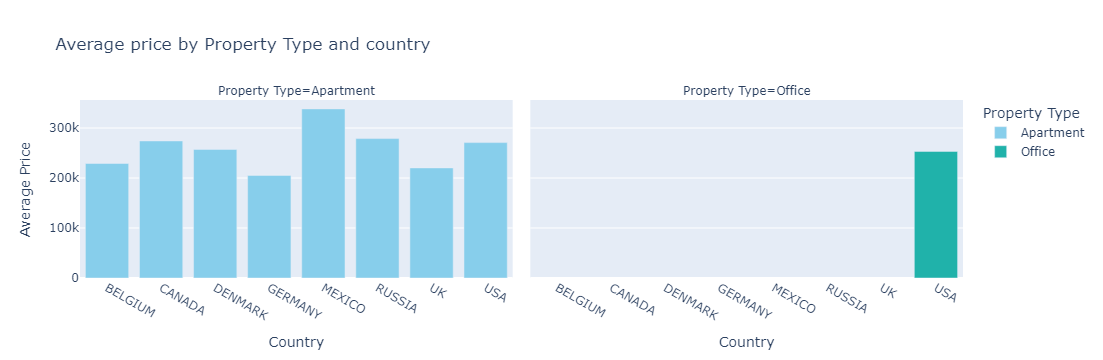

In [580]:
total_price_by_type_and_mortgage = Realstate.groupby(['country', 'type'])['price'].mean().reset_index()

# Create a side-by-side bar chart with separate subplots for mortgaged and non-mortgaged properties
fig = px.bar(total_price_by_type_and_mortgage, x='country', y='price', color='type',
             facet_col='type',
             title='Average price by Property Type and country',
             labels={'price': 'Average Price', 'country': 'Country', 'type': 'Property Type'},
             color_discrete_sequence=['skyblue', 'lightseagreen'])

fig.show()

### Average Deal Satisfaction by Country 

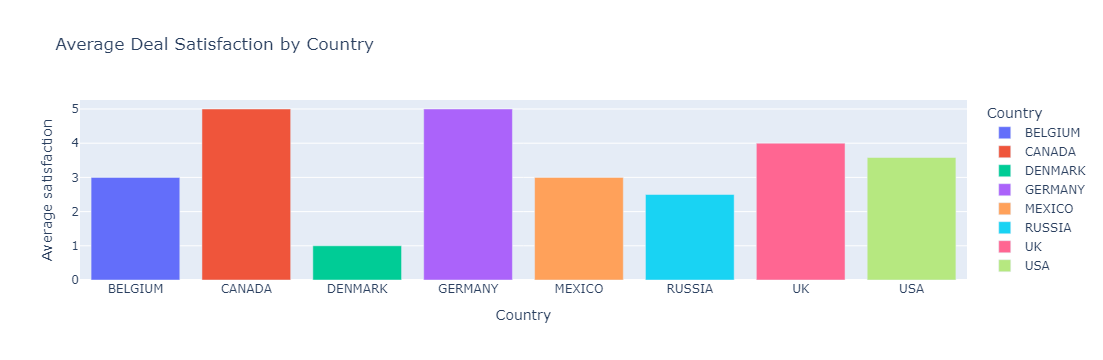

In [581]:
total_price_by_type = Realstate.groupby('country')['deal_satisfaction'].mean().reset_index()

fig = px.bar(total_price_by_type, x='country', y='deal_satisfaction',
             title='Average Deal Satisfaction by Country', 
             labels={'deal_satisfaction': 'Average satisfaction', 'country': 'Country'},
             color='country', 
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.show()

### Average satisfaction by Property Type and country

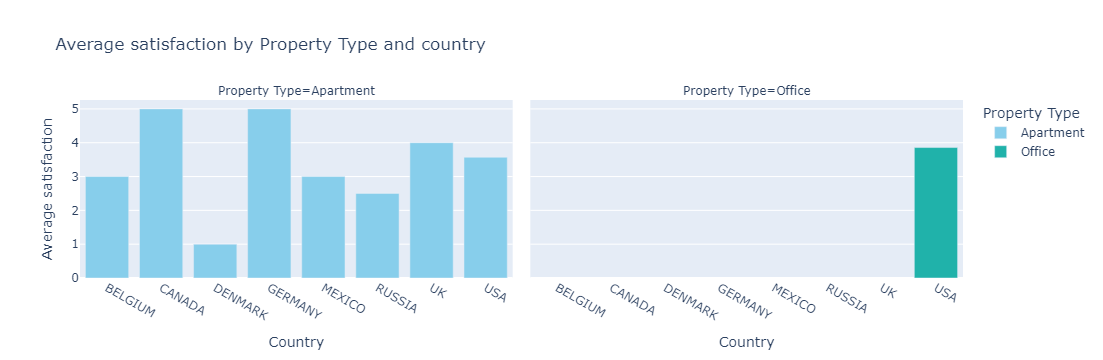

In [582]:
total_price_by_type_and_mortgage = Realstate.groupby(['country', 'type'])['deal_satisfaction'].mean().reset_index()

# Create a side-by-side bar chart with separate subplots for mortgaged and non-mortgaged properties
fig = px.bar(total_price_by_type_and_mortgage, x='country', y='deal_satisfaction', color='type',
             facet_col='type',
             title='Average satisfaction by Property Type and country',
             labels={'deal_satisfaction': 'Average satisfaction', 'country': 'Country', 'type': 'Property Type'},
             color_discrete_sequence=['skyblue', 'lightseagreen'])

fig.show()

### Number of sold properties by state

In [583]:
state_count = Realstate.groupby('state').size()
print(f'Number of Sold properties per state:\n{state_count}')


Number of Sold properties per state:
state
Arizona        11
California    120
Colorado       11
Kansas          1
Nevada         17
Oregon         11
Unknown        86
Utah            5
Virginia        4
Wyoming         1
dtype: int64


### Realtive and cumulative freaquacy of state

In [584]:
frequency = Realstate['state'].value_counts()

# Step 2: Relative Frequency
relative_frequency = frequency / frequency.sum()

# Step 3: Cumulative Frequency
cumulative_frequency = frequency.cumsum()

# Step 4: Combine into a Table
result_table = pd.DataFrame({
    'Frequency': frequency,
    'Relative Frequency': relative_frequency,
    'Cumulative Frequency': cumulative_frequency
})

print(result_table)

            Frequency  Relative Frequency  Cumulative Frequency
state                                                          
California        120            0.449438                   120
Unknown            86            0.322097                   206
Nevada             17            0.063670                   223
Arizona            11            0.041199                   234
Oregon             11            0.041199                   245
Colorado           11            0.041199                   256
Utah                5            0.018727                   261
Virginia            4            0.014981                   265
Kansas              1            0.003745                   266
Wyoming             1            0.003745                   267


### State distribution

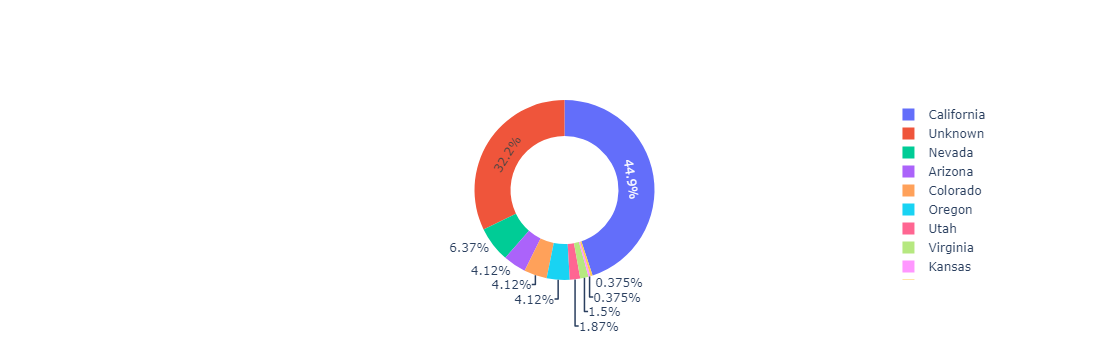

In [585]:
lowerRealstate = Realstate.groupby('state').size()
labels = lowerRealstate.index
values = lowerRealstate.values

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])
fig.show()

### Average Price by State

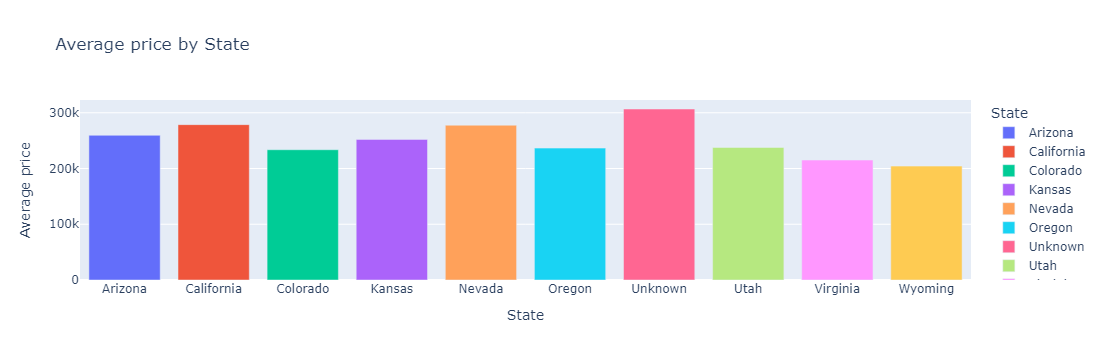

In [586]:
total_price_by_type = Realstate.groupby('state')['price'].mean().reset_index()

fig = px.bar(total_price_by_type, x='state', y='price',
             title='Average price by State', 
             labels={'price': 'Average price', 'state': 'State'},
             color='state', 
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.show()

### Average price by Property Type and state

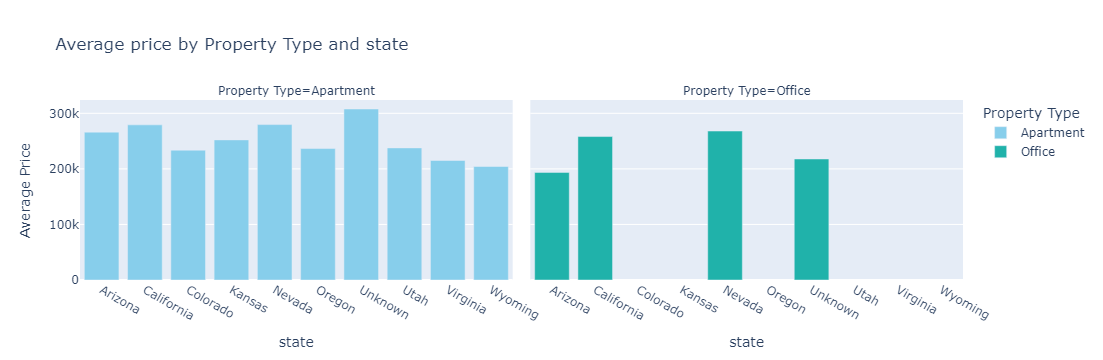

In [587]:
total_price_by_type_and_mortgage = Realstate.groupby(['state', 'type'])['price'].mean().reset_index()

# Create a side-by-side bar chart with separate subplots for mortgaged and non-mortgaged properties
fig = px.bar(total_price_by_type_and_mortgage, x='state', y='price', color='type',
             facet_col='type',
             title='Average price by Property Type and state',
             labels={'price': 'Average Price', 'state': 'state', 'type': 'Property Type'},
             color_discrete_sequence=['skyblue', 'lightseagreen'])

fig.show()

### Average Deal Satisfaction by State

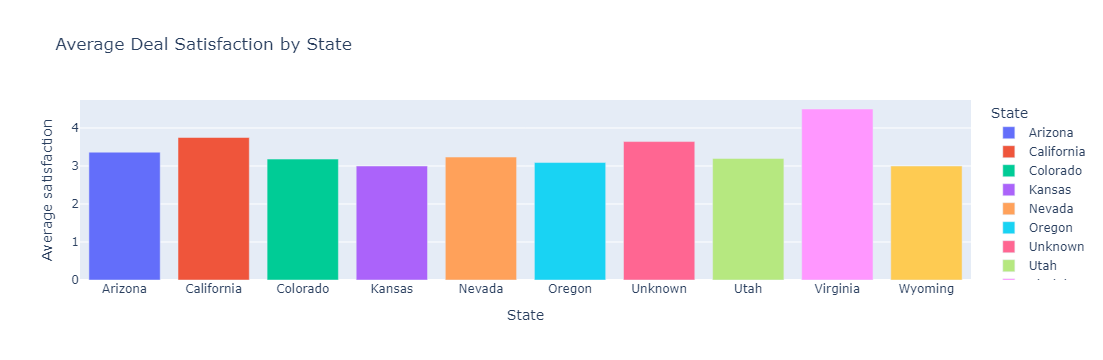

In [588]:
total_price_by_type = Realstate.groupby('state')['deal_satisfaction'].mean().reset_index()

fig = px.bar(total_price_by_type, x='state', y='deal_satisfaction',
             title='Average Deal Satisfaction by State', 
             labels={'deal_satisfaction': 'Average satisfaction', 'state': 'State'},
             color='state', 
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.show()

### Average satisfaction by Property Type and State

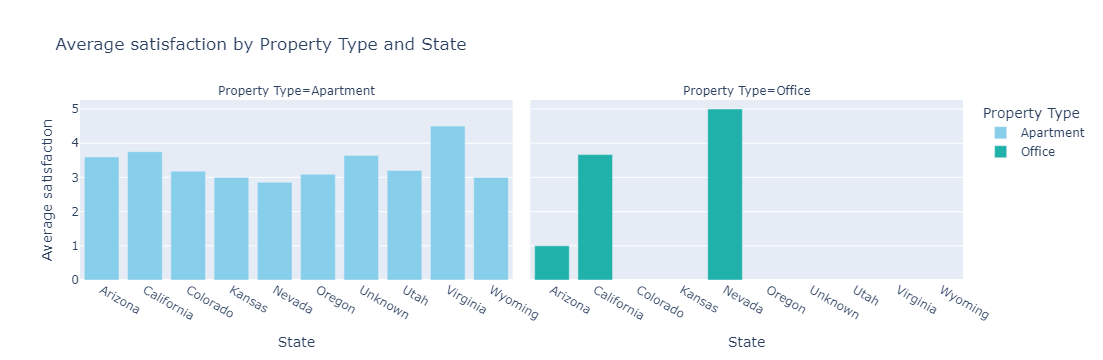

In [589]:
total_price_by_type_and_mortgage = Realstate.groupby(['state', 'type'])['deal_satisfaction'].mean().reset_index()

# Create a side-by-side bar chart with separate subplots for mortgaged and non-mortgaged properties
fig = px.bar(total_price_by_type_and_mortgage, x='state', y='deal_satisfaction', color='type',
             facet_col='type',
             title='Average satisfaction by Property Type and State',
             labels={'deal_satisfaction': 'Average satisfaction', 'state': 'State', 'type': 'Property Type'},
             color_discrete_sequence=['skyblue', 'lightseagreen'])

fig.show()

### Creating age groups 

In [590]:
Realstate['age_at_sale'] = Realstate.apply(
    lambda row: (row['date_sale'].year - row['birth_date'].year) 
                - ((row['date_sale'].month, row['date_sale'].day) < (row['birth_date'].month, row['birth_date'].day)),
    axis=1
)
bins = [19, 25, 31, 36, 42, 48, 54, 59, 65, 71, 76]
labels = ['19.0-25.0','25.0-31.0','31.0-36.0','36.0-42.0','42.0-48.0','48.0-54.0','54.0-59.0','59.0-65.0','65.0-71.0','71.0-76.0'] # Labels for intervals

Realstate['age_group'] = pd.cut(Realstate['age_at_sale'], bins=bins, labels=labels, right=False)

Realstate

,customerid,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,...,id,building,date_sale,type,property,area,price,status,age_at_sale,age_group
0,C0028,Individual,1986-06-21,F,USA,California,Home,5.0,No,Website,...,1030,1,2005-11-01,Apartment,30,743.09,246172.68,Sold,19.0,19.0-25.0
1,C0027,Individual,1983-02-24,F,USA,California,Home,5.0,No,Website,...,1029,1,2005-10-01,Apartment,29,756.21,246331.90,Sold,22.0,19.0-25.0
2,C0112,Individual,1985-12-27,M,USA,California,Home,1.0,Yes,Client,...,2002,2,2007-07-01,Apartment,2,587.28,209280.91,Sold,21.0,19.0-25.0
3,C0160,Individual,1985-12-27,M,USA,California,Investment,3.0,Yes,Website,...,2031,2,2007-12-01,Apartment,31,1604.75,452667.01,Sold,21.0,19.0-25.0
4,C0014,Individual,1979-05-15,F,USA,California,Home,4.0,No,Agency,...,1049,1,2004-11-01,Apartment,49,1375.45,467083.31,Sold,25.0,25.0-31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,NaN,NaN,NaT,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,...,5044,5,2100-01-01,Apartment,44,1238.58,322610.74,Unsold,NaN,NaN
263,NaN,NaN,NaT,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,...,5047,5,2100-01-01,Apartment,47,794.52,279191.26,Unsold,NaN,NaN
264,NaN,NaN,NaT,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,...,5048,5,2100-01-01,Apartment,48,1013.27,287996.53,Unsold,NaN,NaN
265,NaN,NaN,NaT,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,...,5050,5,2100-01-01,Apartment,50,1074.71,365868.78,Unsold,NaN,NaN


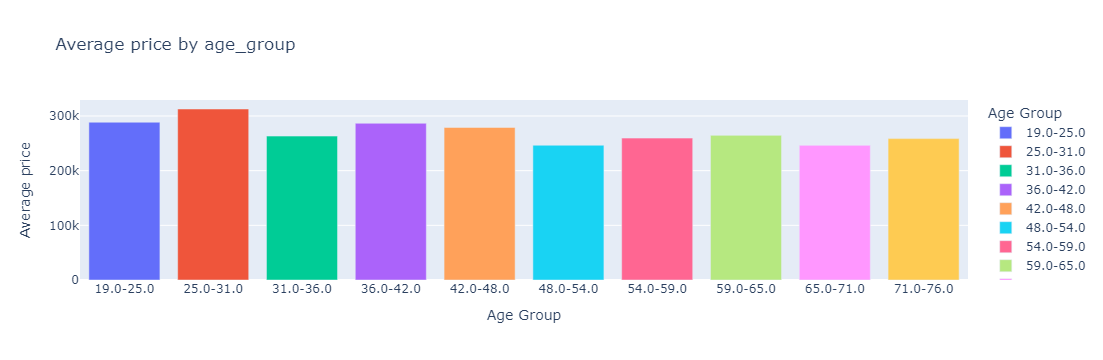

In [591]:
total_price_by_type = Realstate.groupby('age_group', observed=False)['price'].mean().reset_index()

fig = px.bar(total_price_by_type, x='age_group', y='price',
             title='Average price by age_group', 
             labels={'price': 'Average price', 'age_group': 'Age Group'},
             color='age_group', 
             color_discrete_sequence=px.colors.qualitative.Plotly,
            )
fig.show()

### Property sales by age groups

In [592]:
properties_sold = Realstate.groupby('age_group',observed=False).size()

summary_statistics = pd.DataFrame({
    'Properties Sold': properties_sold,
    'Percentage of Total': (properties_sold / properties_sold.sum()) * 100
}).reset_index()

summary_statistics.rename(columns={'age_group': 'Age Group'}, inplace=True)

print(summary_statistics)


   Age Group  Properties Sold  Percentage of Total
0  19.0-25.0                4             2.259887
1  25.0-31.0               16             9.039548
2  31.0-36.0               24            13.559322
3  36.0-42.0               35            19.774011
4  42.0-48.0               24            13.559322
5  48.0-54.0               23            12.994350
6  54.0-59.0               18            10.169492
7  59.0-65.0               12             6.779661
8  65.0-71.0               18            10.169492
9  71.0-76.0                3             1.694915


### Price buckets

In [593]:
bins = [100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000]
labels = ['100000-1500000','150000-200000','200000-250000','250000-300000','300000-350000','350000-400000','400000-450000','450000-500000','500000-550000'] # Labels for intervals

Realstate['price_groups'] = pd.cut(Realstate['price'], bins=bins, labels=labels, right=False)

Realstate

,customerid,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,...,building,date_sale,type,property,area,price,status,age_at_sale,age_group,price_groups
0,C0028,Individual,1986-06-21,F,USA,California,Home,5.0,No,Website,...,1,2005-11-01,Apartment,30,743.09,246172.68,Sold,19.0,19.0-25.0,200000-250000
1,C0027,Individual,1983-02-24,F,USA,California,Home,5.0,No,Website,...,1,2005-10-01,Apartment,29,756.21,246331.90,Sold,22.0,19.0-25.0,200000-250000
2,C0112,Individual,1985-12-27,M,USA,California,Home,1.0,Yes,Client,...,2,2007-07-01,Apartment,2,587.28,209280.91,Sold,21.0,19.0-25.0,200000-250000
3,C0160,Individual,1985-12-27,M,USA,California,Investment,3.0,Yes,Website,...,2,2007-12-01,Apartment,31,1604.75,452667.01,Sold,21.0,19.0-25.0,450000-500000
4,C0014,Individual,1979-05-15,F,USA,California,Home,4.0,No,Agency,...,1,2004-11-01,Apartment,49,1375.45,467083.31,Sold,25.0,25.0-31.0,450000-500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,NaN,NaN,NaT,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,...,5,2100-01-01,Apartment,44,1238.58,322610.74,Unsold,NaN,NaN,300000-350000
263,NaN,NaN,NaT,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,...,5,2100-01-01,Apartment,47,794.52,279191.26,Unsold,NaN,NaN,250000-300000
264,NaN,NaN,NaT,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,...,5,2100-01-01,Apartment,48,1013.27,287996.53,Unsold,NaN,NaN,250000-300000
265,NaN,NaN,NaT,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,...,5,2100-01-01,Apartment,50,1074.71,365868.78,Unsold,NaN,NaN,350000-400000


In [594]:
corr_Realestate = Realstate.select_dtypes(include=np.number)
corr_Realestate = corr_Realestate.corr()


print("Correlation using Pandas:\n", corr_Realestate)


Correlation using Pandas:
                    deal_satisfaction        id  building  property      area  \
deal_satisfaction           1.000000  0.014443  0.015458 -0.083568  0.051477   
id                          0.014443  1.000000  0.999939  0.031451  0.001287   
building                    0.015458  0.999939  1.000000  0.020420 -0.001998   
property                   -0.083568  0.031451  0.020420  1.000000  0.297502   
area                        0.051477  0.001287 -0.001998  0.297502  1.000000   
price                       0.017681  0.003574  0.000487  0.279711  0.951087   
age_at_sale                 0.079836  0.120012  0.121446 -0.115616 -0.182235   

                      price  age_at_sale  
deal_satisfaction  0.017681     0.079836  
id                 0.003574     0.120012  
building           0.000487     0.121446  
property           0.279711    -0.115616  
area               0.951087    -0.182235  
price              1.000000    -0.175911  
age_at_sale       -0.175911    

### Heatmap

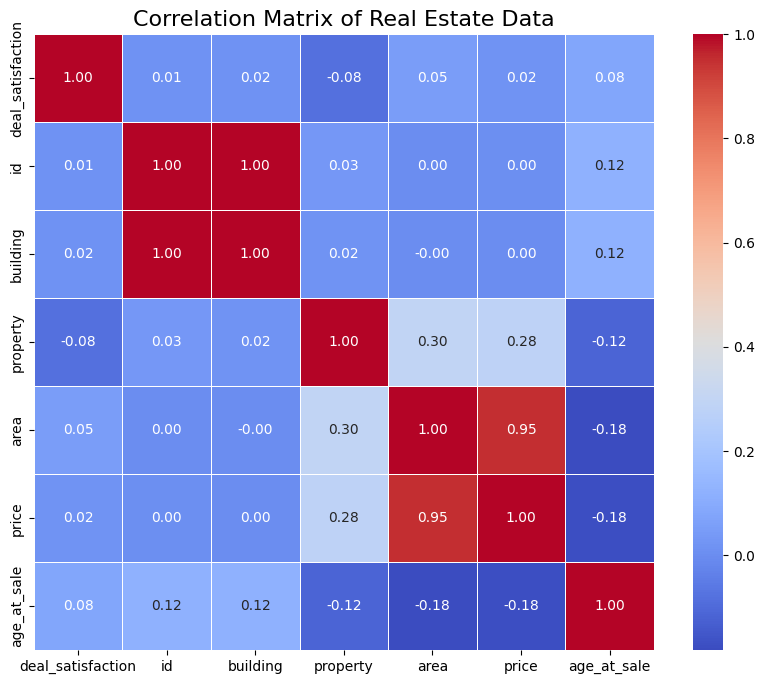

In [595]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_Realestate, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix of Real Estate Data", fontsize=16)

plt.show()


### 1. What is the average deal satisfaction for each country? How does it look by state?



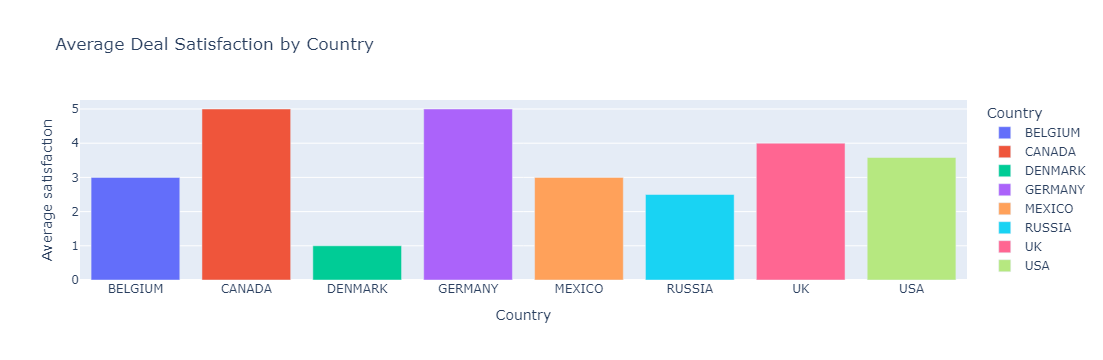

In [597]:
total_price_by_type = Realstate.groupby('country')['deal_satisfaction'].mean().reset_index()

fig = px.bar(total_price_by_type, x='country', y='deal_satisfaction',
             title='Average Deal Satisfaction by Country', 
             labels={'deal_satisfaction': 'Average satisfaction', 'country': 'Country'},
             color='country', 
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.show()

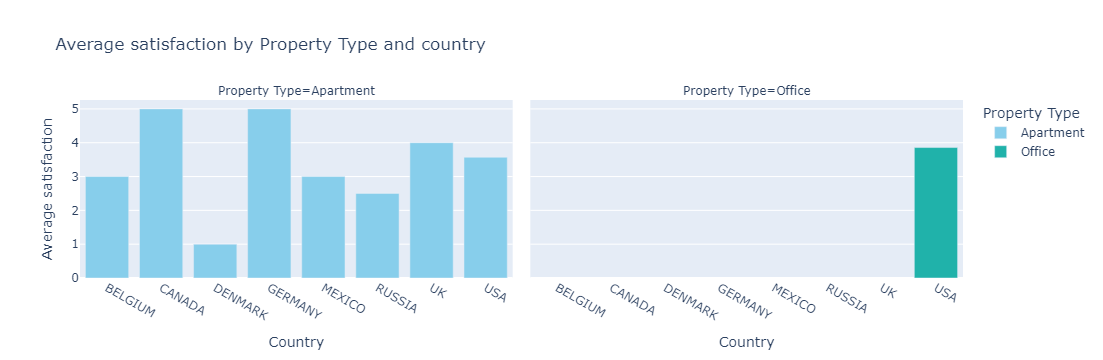

In [598]:
total_price_by_type_and_mortgage = Realstate.groupby(['country', 'type'])['deal_satisfaction'].mean().reset_index()

# Create a side-by-side bar chart with separate subplots for mortgaged and non-mortgaged properties
fig = px.bar(total_price_by_type_and_mortgage, x='country', y='deal_satisfaction', color='type',
             facet_col='type',
             title='Average satisfaction by Property Type and country',
             labels={'deal_satisfaction': 'Average satisfaction', 'country': 'Country', 'type': 'Property Type'},
             color_discrete_sequence=['skyblue', 'lightseagreen'])

fig.show()

### * Average deal satisfaction by state

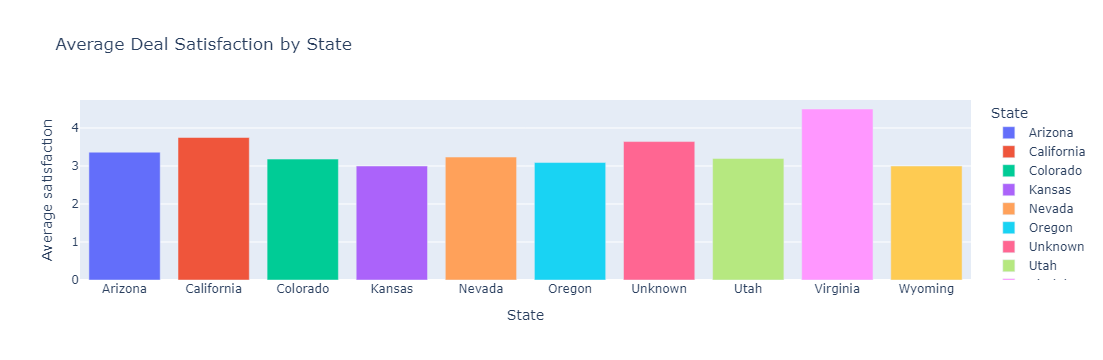

In [709]:
total_price_by_type = Realstate.groupby('state')['deal_satisfaction'].mean().reset_index()

fig = px.bar(total_price_by_type, x='state', y='deal_satisfaction',
             title='Average Deal Satisfaction by State', 
             labels={'deal_satisfaction': 'Average satisfaction', 'state': 'State'},
             color='state', 
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.show()

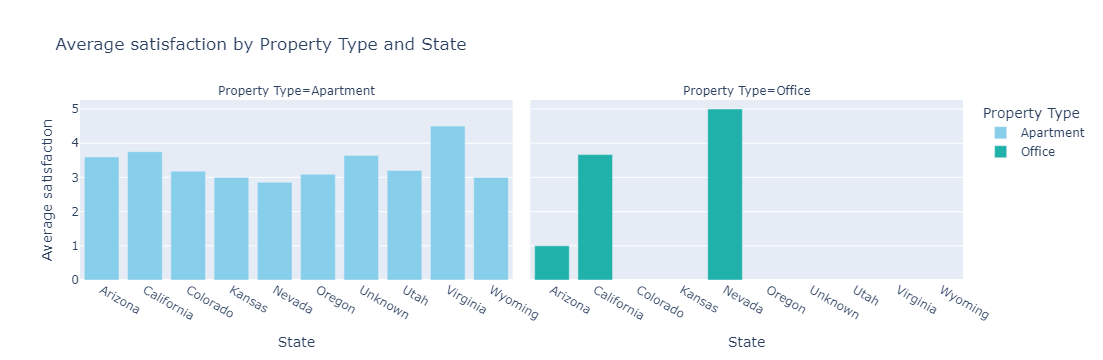

In [601]:
total_price_by_type_and_mortgage = Realstate.groupby(['state', 'type'])['deal_satisfaction'].mean().reset_index()

# Create a side-by-side bar chart with separate subplots for mortgaged and non-mortgaged properties
fig = px.bar(total_price_by_type_and_mortgage, x='state', y='deal_satisfaction', color='type',
             facet_col='type',
             title='Average satisfaction by Property Type and State',
             labels={'deal_satisfaction': 'Average satisfaction', 'state': 'State', 'type': 'Property Type'},
             color_discrete_sequence=['skyblue', 'lightseagreen'])

fig.show()

### 2. Monthly revenue by company 

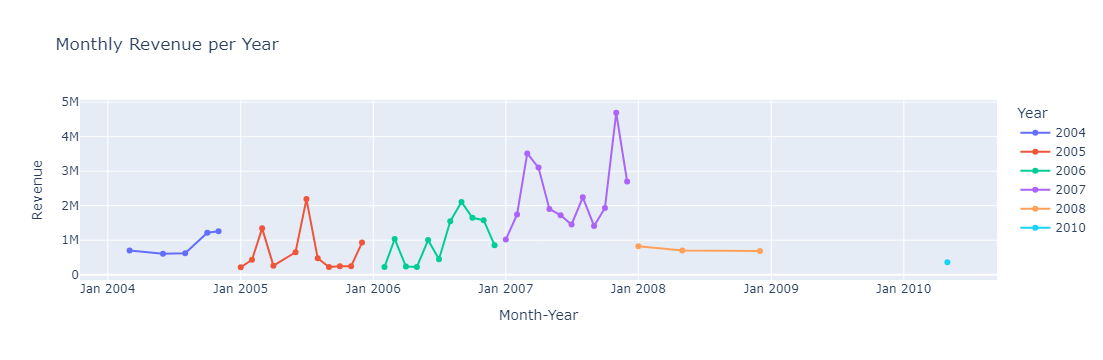

In [603]:
# Ensure 'year' is derived before filtering
Realstate['year'] = Realstate['date_sale'].dt.year  
Realstate['month'] = Realstate['date_sale'].dt.month  

# Filter out rows where the year is 2100
Realstate_filtered = Realstate[Realstate['year'] != 2100].copy()


monthly_revenue = Realstate_filtered.groupby(['year', 'month'])['price'].sum().reset_index()


monthly_revenue['year_month'] = pd.to_datetime(
    monthly_revenue[['year', 'month']].assign(day=1)
)

fig = px.line(
    monthly_revenue, 
    x='year_month', 
    y='price', 
    color='year', 
    title='Monthly Revenue per Year',
    labels={'price': 'Revenue', 'year_month': 'Date'},
    markers=True
)
fig.update_layout(
    xaxis_title="Month-Year",
    yaxis_title="Revenue",
    legend_title="Year",
    xaxis=dict(tickformat="%b %Y"),
    hovermode="x unified"
)
fig.show()


## 3. How many apartments are sold in each state?

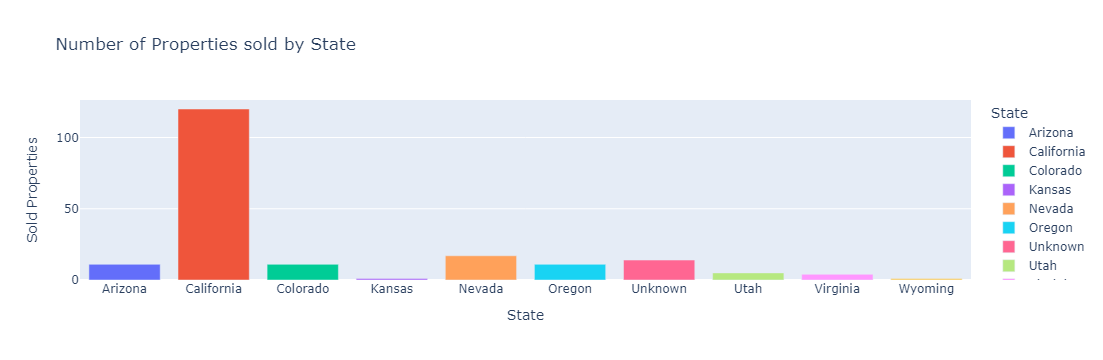

In [605]:
# Filter for sold properties
sold_properties = Realstate[Realstate['status'] == 'Sold']

# Group by state and count the number of sold properties
total_price_by_type = sold_properties.groupby('state').size().reset_index(name='status')

# Create the bar chart
fig = px.bar(total_price_by_type, x='state', y='status',
             title='Number of Properties sold by State', 
             labels={'status': 'Sold Properties', 'state': 'State'},
             color='state', 
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.show()


## 4. What is the age distribution for customers?

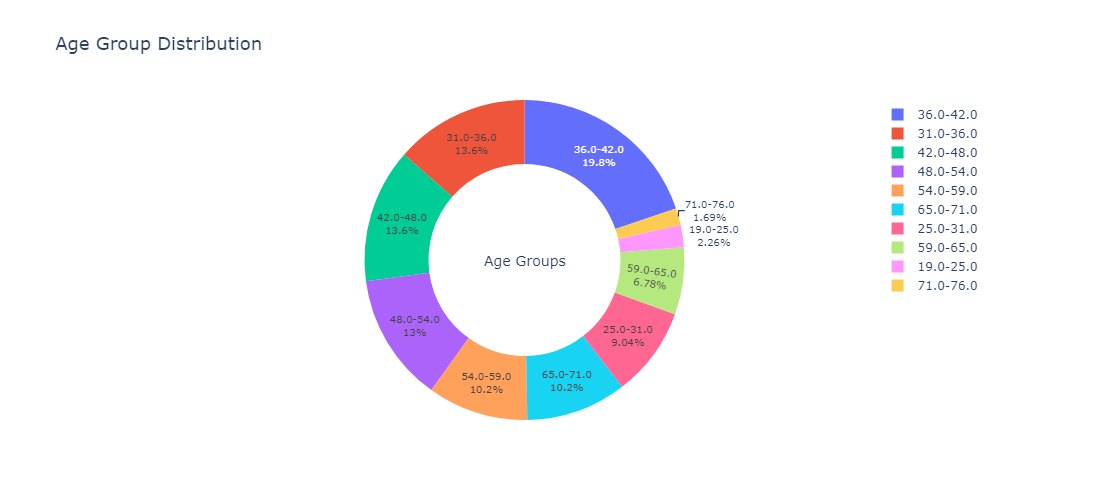

In [607]:
import plotly.graph_objects as go

# Group by 'age_group' and count the occurrences
lowerRealstate = Realstate['age_group'].value_counts(sort=False) 
labels = lowerRealstate.index
values = lowerRealstate.values

# Create a donut chart
fig = go.Figure(data=[go.Pie(
    labels=labels, 
    values=values, 
    hole=0.6,  
    textinfo='percent+label',  
    hoverinfo='label+value+percent', 
    textfont=dict(size=10)  
)])


fig.update_layout(
    title_text="Age Group Distribution",
    title_font=dict(size=18), 
    annotations=[dict(text='Age Groups', x=0.5, y=0.5, font_size=14, showarrow=False)],
    width=1000,  
    height=500,  
)

# Show the chart
fig.show()


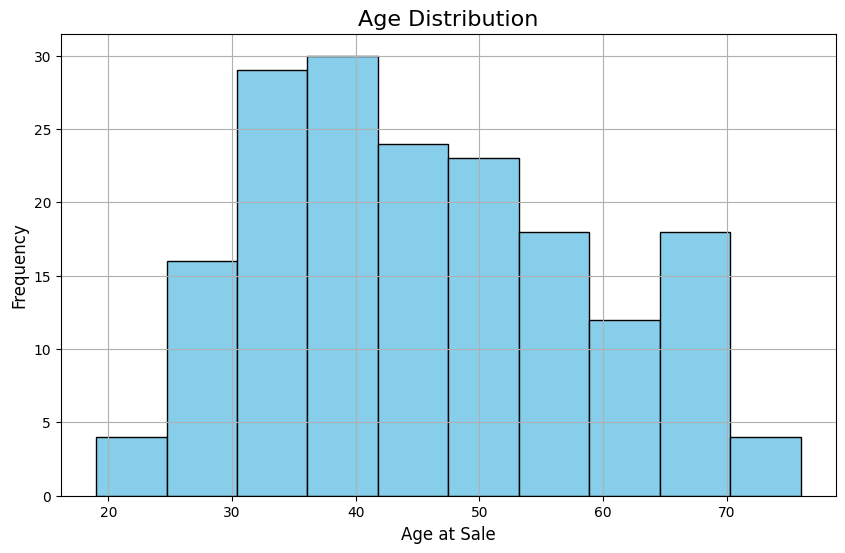

In [608]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(Realstate['age_at_sale'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age at Sale', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


### 5. What are the yaerly sales for each building?

    Building  Year  Number of Yearly Sales
0          1  2004                      15
1          1  2005                      24
2          1  2006                       6
3          1  2007                       1
4          2  2004                       1
5          2  2005                       3
6          2  2006                      23
7          2  2007                      27
8          3  2006                       8
9          3  2007                      43
10         3  2008                       2
11         4  2006                       2
12         4  2007                      20
13         4  2008                       1
14         5  2006                       1
15         5  2007                      11
16         5  2008                       6
17         5  2010                       1


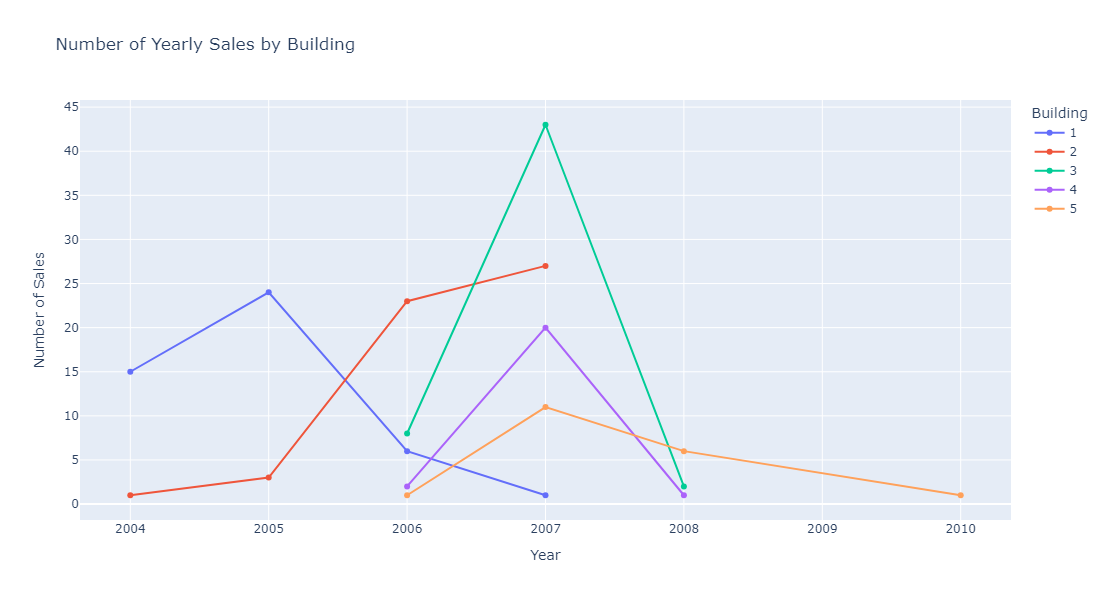

In [610]:
# Extract the year from 'date_sale'
Realstate['year'] = Realstate['date_sale'].dt.year

# Filter out rows where the year is 2100
Realstate = Realstate[Realstate['year'] != 2100].copy()

# Group by 'building' and 'year' to calculate the number of sales
yearly_sales_by_building = (
    Realstate.groupby(['building', 'year'])['property']
    .size()  # Count the number of rows (sales)
    .reset_index()
    .sort_values(by=['building', 'year'])  # Optional: Sort for better readability
)

# Rename columns for clarity
yearly_sales_by_building.columns = ['Building', 'Year', 'Number of Yearly Sales']

# Display the result
print(yearly_sales_by_building)

# Plot the number of yearly sales trends for each building using Plotly
import plotly.express as px

fig = px.line(
    yearly_sales_by_building,
    x='Year',
    y='Number of Yearly Sales',
    color='Building',
    title='Number of Yearly Sales by Building',
    labels={'Number of Yearly Sales': 'Number of Sales', 'Building': 'Building'},
    markers=True  # Add markers for clarity
)

# Improve layout for better visualization
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Number of Sales",
    legend_title="Building",
    hovermode="x unified",  # Unified hover effect
    width=1100,  # Adjust the chart size
    height=600,
)

# Show the figure
fig.show()


    Building  Year  Yearly Revenue
0          1  2004      4227851.51
1          1  2005      6324598.20
2          1  2006      1659489.53
3          1  2007       448134.27
4          2  2004       169158.29
5          2  2005       890634.21
6          2  2006      6618314.39
7          2  2007      7386069.24
8          3  2006      1920832.69
9          3  2007     11381105.84
10         3  2008       437840.60
11         4  2006       457771.98
12         4  2007      5472320.12
13         4  2008       388515.14
14         5  2006       249591.99
15         5  2007      2764168.87
16         5  2008      1385804.31
17         5  2010       357538.20


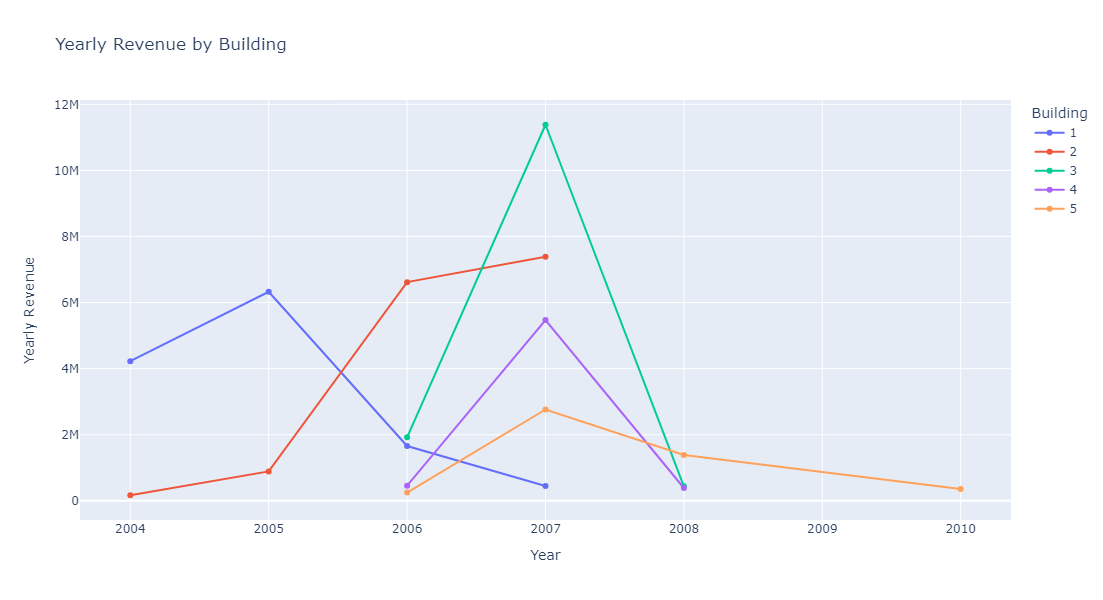

In [611]:
Realstate['year'] = Realstate['date_sale'].dt.year

Realstate = Realstate[Realstate['year'] != 2100].copy()

yearly_revenue_by_building = (
    Realstate.groupby(['building', 'year'])['price']
    .sum()
    .reset_index()
    .sort_values(by=['building', 'year']) 
)

yearly_revenue_by_building.columns = ['Building', 'Year', 'Yearly Revenue']

print(yearly_revenue_by_building)


fig = px.line(
    yearly_revenue_by_building,
    x='Year',
    y='Yearly Revenue',
    color='Building',
    title='Yearly Revenue by Building',
    labels={'Yearly Revenue': 'Revenue', 'Building': 'Building'},
    markers=True,  
)

fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Yearly Revenue",
    legend_title="Building",
    hovermode="x unified", 
    width=1100, 
    height=600,
)

# Show the figure
fig.show()


In [720]:
import platform
print("Python version")
print(platform.python_version())


Python version
3.12.4
